In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
data = '../input/covid-face-mask-detection-dataset/New Masks Dataset'
train = os.path.join(data,'Train')
test = os.path.join(data,'Test')
valid = os.path.join(data,'Validation')

train_mask = os.path.join(train,'Mask')
train_nomask = os.path.join(train,'Non Mask')
train_mask = os.listdir(train_mask)
print(train_mask[15:25])

train_nomask_names = os.listdir(train_nomask)
print(train_nomask_names[15:25])

['0372.jpg', '1548.jpg', '0932.jpg', '0006.jpg', '0559.jpg', '1473.jpg', '1669.jpg', '0862.jpg', '1058.jpg', '1166.jpg']
['215.jpg', '185.jpg', '243.jpg', '153.jpg', '143.jpg', '327.jpg', '253.jpg', '115.jpg', '131.jpg', '151.jpg']


['../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/1037.png', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/1488.jpg', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/1539.jpg', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/1409.jpg', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/1154.jpg', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/0372.jpg', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/1548.jpg', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/0932.jpg', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/0006.jpg', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask/0559.jpg']
['../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask/109.jpg', '../input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non

ValueError: num must be 1 <= num <= 16, not 17

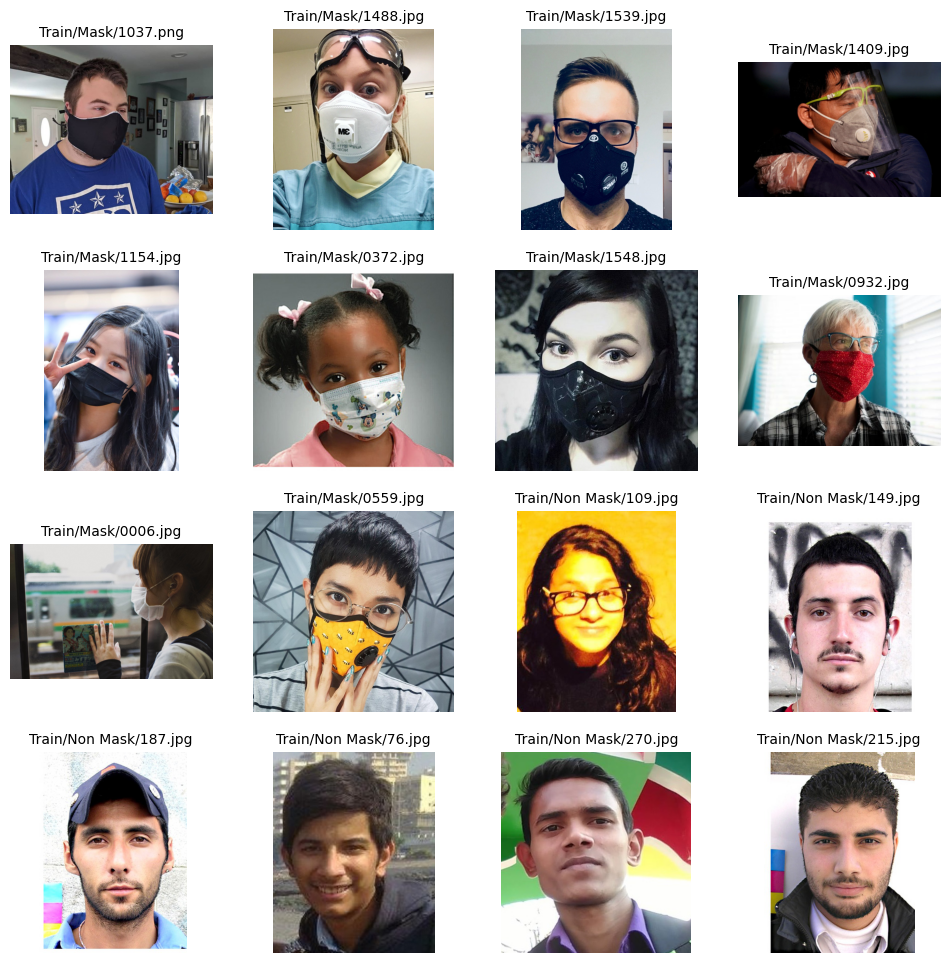

In [5]:
import matplotlib.image as mpimg
n_rows = 4
ncols = 4
plt.figure(figsize=(12,12))
mask_picture = []
for i in train_mask[10:20]:
  mask_picture.append(os.path.join(train_mask,i))
nomask_pic = []
for i in train_nomask_names[10:20]:
  nomask_pic.append(os.path.join(train_nomask,i))
print(mask_picture)
print(nomask_pic)
merged_pics = mask_picture+nomask_pic
for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
plt.show()

In [6]:
data_train = ImageDataGenerator(rescale=1./255, zoom_range = 0.2,rotation_range = 40,horizontal_flip = True)
data_test = ImageDataGenerator(rescale=1./255)
valid_data = ImageDataGenerator(rescale=1./255)
train_generator = data_train.flow_from_directory(train,target_size=(150,150),batch_size = 32,class_mode = 'binary')
test_generator = data_test.flow_from_directory(test,target_size=(150,150),batch_size = 32,class_mode = 'binary')
valid_generator = valid_data.flow_from_directory(valid,target_size=(150,150),batch_size = 32,class_mode = 'binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [11]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30


2023-02-26 18:37:36.855618: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


19/19 [==============================] - 29s 1s/step - loss: 3.2225 - accuracy: 0.5117 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 14s 735ms/step - loss: 0.6169 - accuracy: 0.6583 - val_loss: 0.6118 - val_accuracy: 0.7484
Epoch 3/30
19/19 [==============================] - 14s 738ms/step - loss: 0.4569 - accuracy: 0.8150 - val_loss: 0.5496 - val_accuracy: 0.7876
Epoch 4/30
19/19 [==============================] - 15s 784ms/step - loss: 0.3713 - accuracy: 0.8650 - val_loss: 0.4006 - val_accuracy: 0.8954
Epoch 5/30
19/19 [==============================] - 14s 736ms/step - loss: 0.3395 - accuracy: 0.8733 - val_loss: 0.4136 - val_accuracy: 0.8758
Epoch 6/30
19/19 [==============================] - 14s 770ms/step - loss: 0.2896 - accuracy: 0.8950 - val_loss: 0.3012 - val_accuracy: 0.9020
Epoch 7/30
19/19 [==============================] - 14s 729ms/step - loss: 0.2623 - accuracy: 0.9117 - val_loss: 0.3023 - val_accuracy: 0.8954
Epoch 8/30
19

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

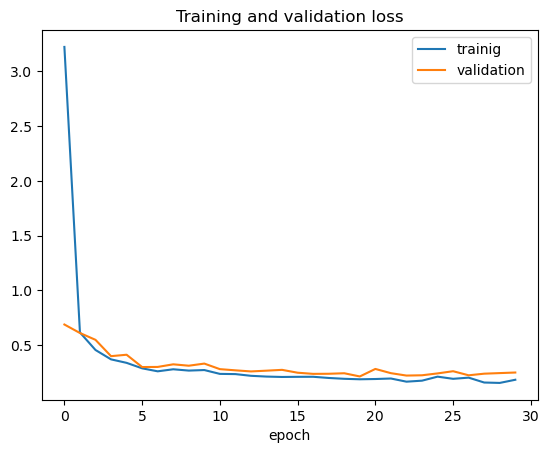

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

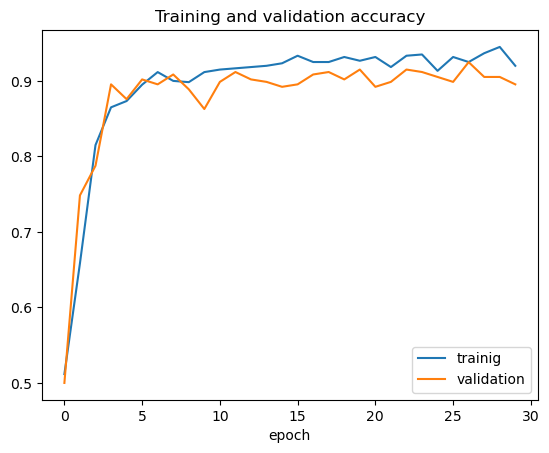

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [15]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 2s 548ms/step - loss: 0.2142 - accuracy: 0.9000
test acc :0.8999999761581421 test loss:0.2141808718442917


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

upload_file = files.upload()
for i in upload_file.keys():
  image_path='/content/'+i
  img = image.load_img(image_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(i)
  if prediction==0:
    print('mask')
  else:
    print('nomask')